## Loading Library

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)


#!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [58]:
#1
# load the data set ans show the first five transaction
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [59]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [60]:
#3 check missing values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals that none of the columns have missing values

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

C:\Users\miche\AppData\Local\Temp\ipykernel_30040\3286788657.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


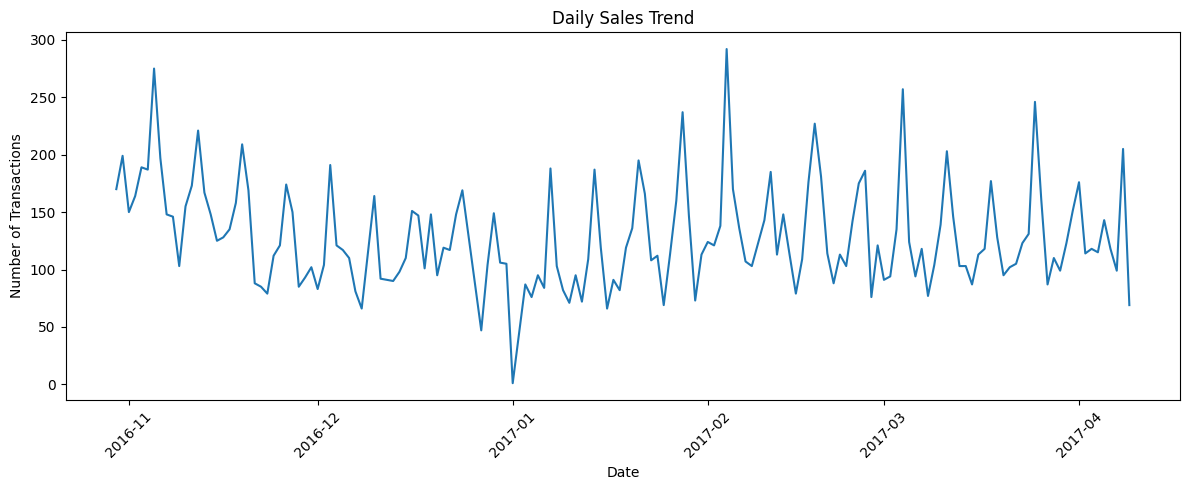

In [ ]:
# 5

df['date_time'] = pd.to_datetime(df['date_time'])

# Extract date and hour
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

import matplotlib.pyplot as plt

daily_trend = df.groupby('date').size()

plt.figure(figsize=(12,5))
daily_trend.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [ ]:
#6
df["date_time"] = pd.to_datetime(df["date_time"], format="%d-%m-%Y %H:%M")
df["date_time_formatted"] = df["date_time"].dt.strftime("%Y-%m-%d %H:%M:%S")

df["day"] = df["date_time"].dt.day
df["month"] = df["date_time"].dt.month
df["year"] = df["date_time"].dt.year
df["time"] = df["date_time"].dt.strftime("%H:%M:%S")
df["hour"] = df["date_time"].dt.hour
df["day_name"] = df["date_time"].dt.day_name()

df.head()


,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,day_name,date_time_formatted,day,month,year,time
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,9,Sunday,2016-10-30 09:58:00,30,10,2016,09:58:00
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,Sunday,2016-10-30 10:05:00,30,10,2016,10:05:00
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,Sunday,2016-10-30 10:05:00,30,10,2016,10:05:00
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,Sunday,2016-10-30 10:07:00,30,10,2016,10:07:00
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,Sunday,2016-10-30 10:07:00,30,10,2016,10:07:00



Alright, now I can easily create a visualization of monthly sales.

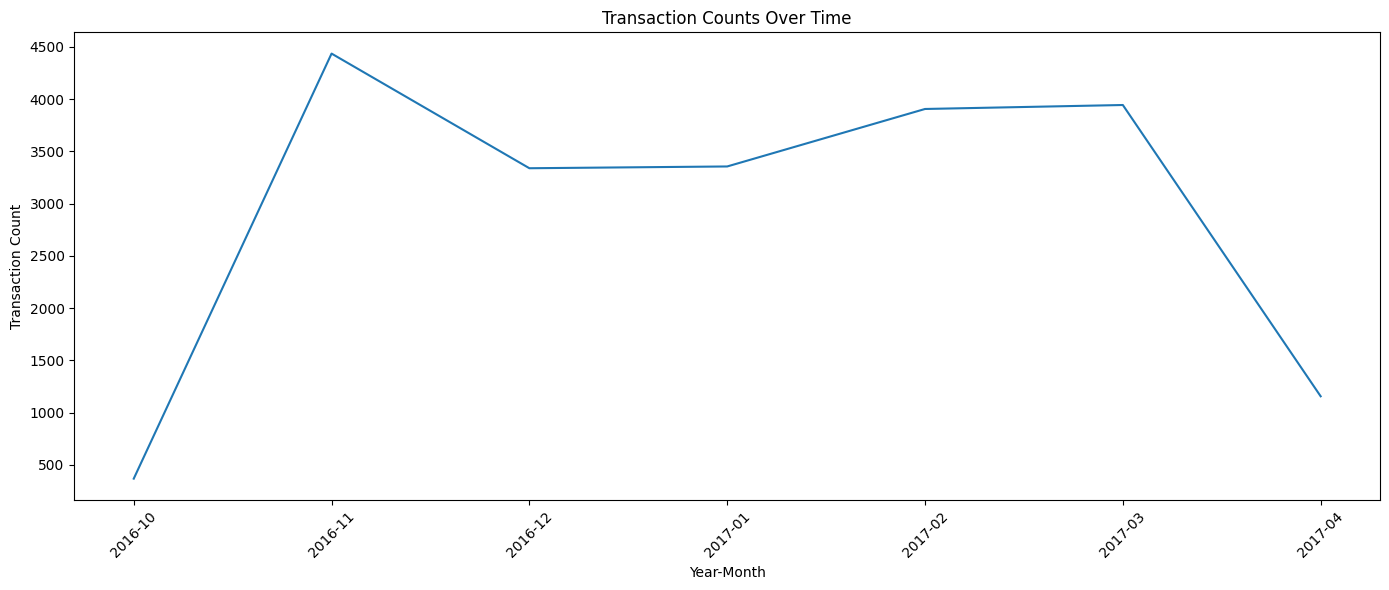

In [ ]:
# 7

import matplotlib.pyplot as plt

df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")
df['YearMonth'] = df['date_time'].dt.to_period('M').astype(str)
monthly_counts = df.groupby('YearMonth')['Transaction'].count().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(monthly_counts['YearMonth'], monthly_counts['Transaction'])

plt.title("Transaction Counts Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Transaction Count")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

The chart shows clear monthly fluctuations in transaction activity. There is a sharp increase from October to November, where transactions peak at their highest level. Activity then drops in December but remains relatively stable through January. A gradual recovery occurs in February and March, suggesting stronger customer engagement early in the year. However, April sees a significant decline, which may indicate seasonal effects or reduced demand. Overall, the pattern highlights strong late-year performance, steady early-year transactions, and a notable drop entering April.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [64]:
#9

print("Unique weekday names:", df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique())
print("Unique weekend names:", df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique())

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [65]:
#10
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month

pivot_month_day = (
    df.pivot_table(
        index='month',
        columns='day_name',
        values='Transaction',
        aggfunc='count'
    )
    .reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .fillna(0)
    .astype(int)
)

print(pivot_month_day)

day_name  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month                                                                   
1            329      474        322       399     489       807     536
2            474      429        419       456     599       879     650
3            379      433        459       557     674       883     559
4            118      115        143       118      99       381     183
10           199        0          0         0       0         0     170
11           469      599        576       591     639       879     683
12           356      342        402       525     624       776     314


11. Wow, it turns out the insight that can be gained from the table above is _____

This table shows consistent patterns in customer activity across months and days of the week. Weekends, especially Saturdays, consistently have the highest transaction counts, indicating strong weekend demand. Fridays and Sundays also show elevated activity, while Mondays tend to be the slowest across most months. Transaction volumes peak in months like February, March, and November, while April shows a noticeable drop across all days, likely due to seasonal or operational factors. Overall, the data highlights clear weekly cycles and strong weekend-driven sales.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

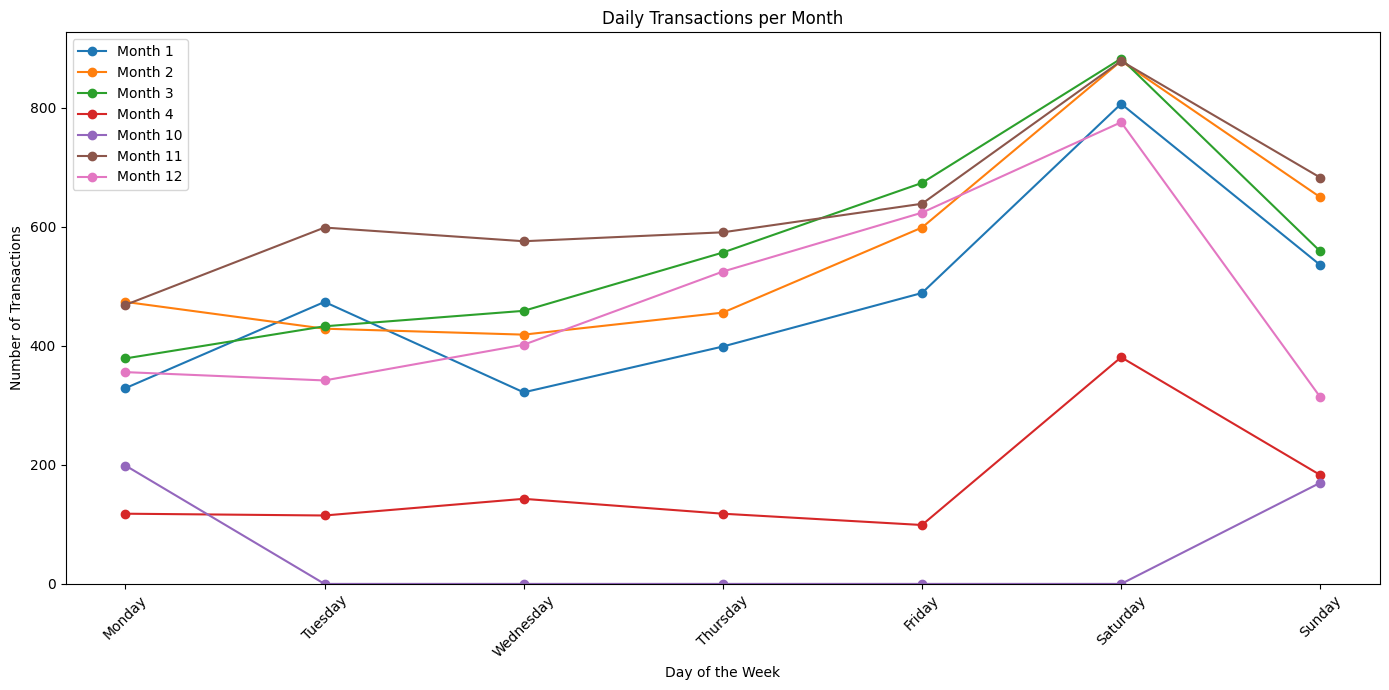

In [ ]:
#12
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for month in pivot_month_day.index:
    plt.plot(
        pivot_month_day.columns,
        pivot_month_day.loc[month],
        marker='o',
        label=f"Month {month}"
    )

plt.title("Daily Transactions per Month")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.legend()
plt.xticks(rotation=45)

plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

show how weekends consistently outperform weekdays across most months, with Saturday emerging as the strongest sales day.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [67]:
# 14
print(set(df["period_day"]))

{'morning', 'evening', 'night', 'afternoon'}


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [ ]:
# 15

morning_hours = sorted(df[df["period_day"] == "morning"]["hour"].unique())
print("Unique morning_hour:", morning_hours)

afternoon_hours = sorted(df[df["period_day"] == "afternoon"]["hour"].unique())
print("Unique afternoon_hour:", afternoon_hours)

evening_hours = sorted(df[df["period_day"] == "evening"]["hour"].unique())
print("Unique evening_hour:", evening_hours)

night_hours = sorted(df[df["period_day"] == "night"]["hour"].unique())
print("Unique night_hour:", night_hours)


Unique morning_hour: [1, 7, 8, 9, 10, 11]
Unique afternoon_hour: [12, 13, 14, 15, 16]
Unique evening_hour: [17, 18, 19, 20]
Unique night_hour: [21, 22, 23]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Yes, the odd part is that the morning_hour category includes the value 1, which corresponds to 1 a.m., a time normally considered late night rather than morning. Morning hours typically start around 5–6 a.m., so having 1 a.m. grouped as “morning” suggests a misclassification in the time of day encoding. This mismatch can lead to inaccurate interpretations of customer behavior across different periods of the day.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

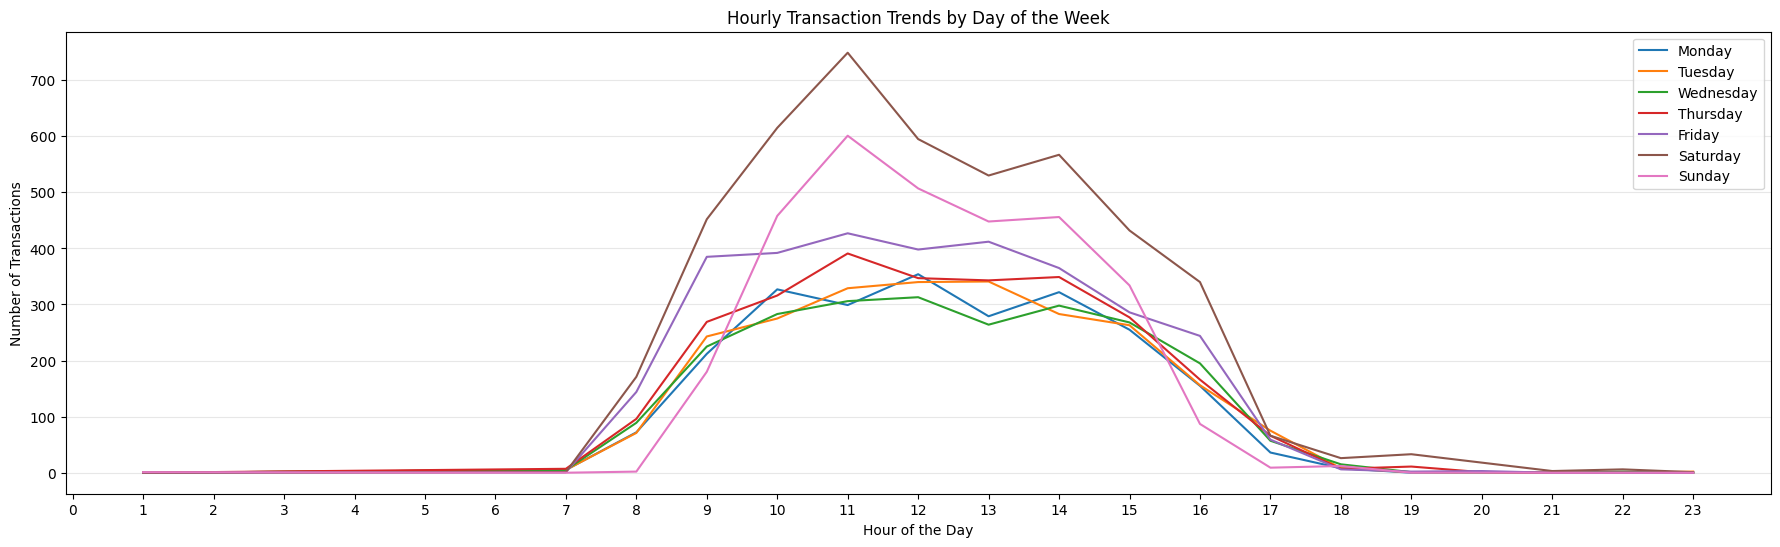

In [ ]:
# 17

import matplotlib.pyplot as plt

hourly_trends = df.groupby(['day_name', 'hour']).size().unstack(fill_value=0)

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hourly_trends = hourly_trends.reindex(ordered_days)

plt.figure(figsize=(22, 6))

for day in hourly_trends.index:
    plt.plot(hourly_trends.columns, hourly_trends.loc[day], label=day)

plt.title("Hourly Transaction Trends by Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.legend()
plt.xticks(range(0, 24))  
plt.grid(axis='y', alpha=0.3)

plt.show()


18. The daily sales trend plot reveals that ___________

The daily sales pattern shows that transactions are at their lowest during the early morning, then increase quickly after 7 a.m. Activity reaches its highest point from late morning to early afternoon—most noticeably on weekends—before steadily tapering off as the day moves into the evening.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

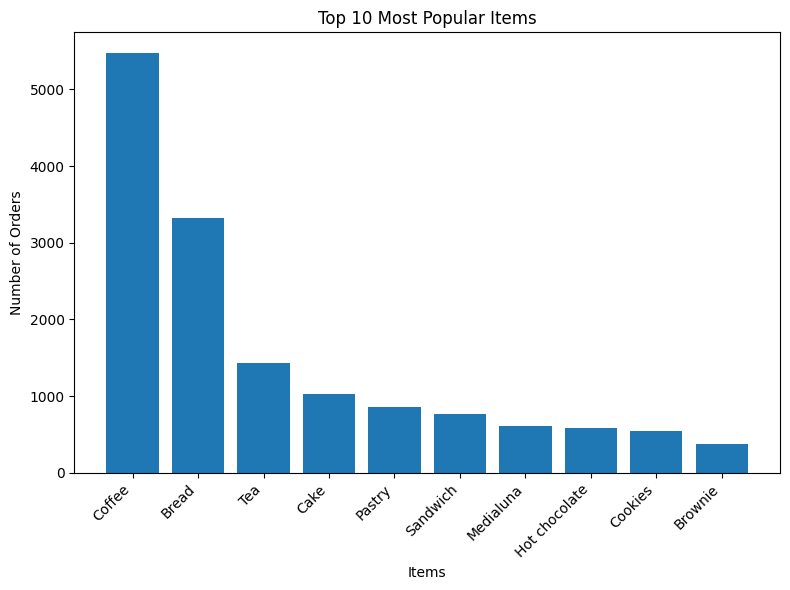

In [ ]:
# 19
import matplotlib.pyplot as plt

item_counts = df['Item'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.bar(item_counts.index, item_counts.values)

plt.title("Top 10 Most Popular Items")
plt.xlabel("Items")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

C:\Users\miche\AppData\Local\Temp\ipykernel_30040\2715903539.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette=sns.light_palette(color, n_colors=10))


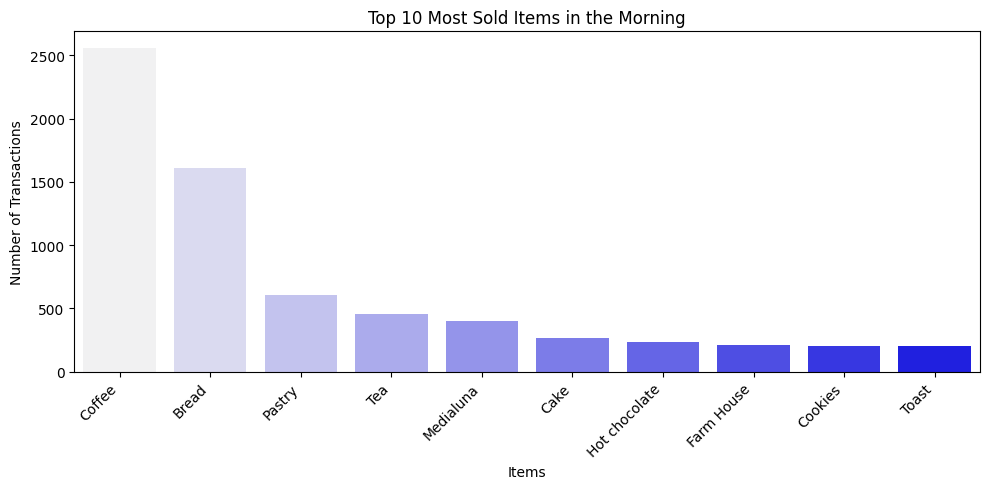

C:\Users\miche\AppData\Local\Temp\ipykernel_30040\2715903539.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette=sns.light_palette(color, n_colors=10))


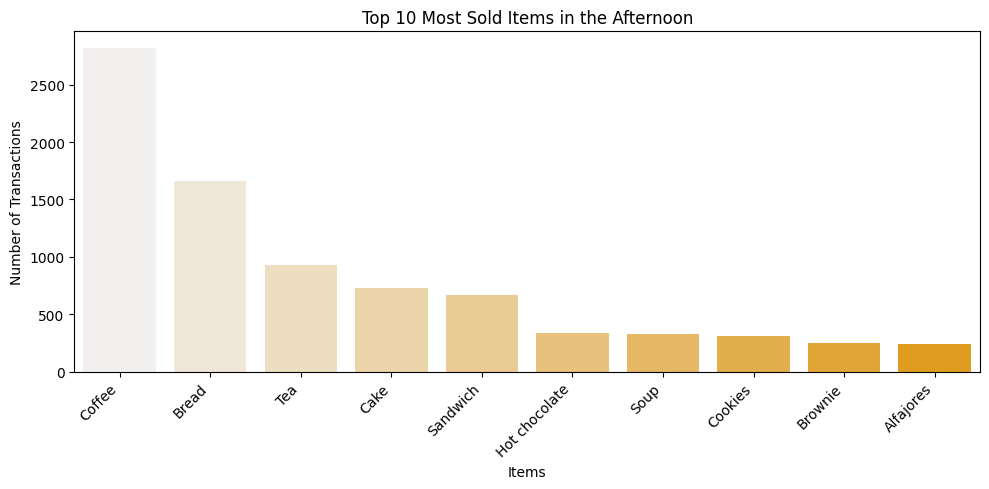

C:\Users\miche\AppData\Local\Temp\ipykernel_30040\2715903539.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette=sns.light_palette(color, n_colors=10))


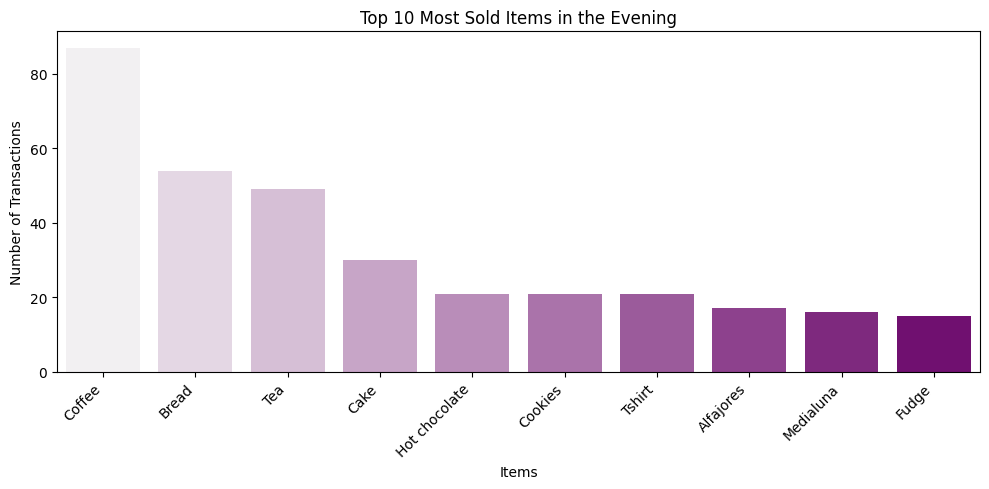

C:\Users\miche\AppData\Local\Temp\ipykernel_30040\2715903539.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette=sns.light_palette(color, n_colors=10))
C:\Users\miche\AppData\Local\Temp\ipykernel_30040\2715903539.py:15: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x=top_items.index, y=top_items.values, palette=sns.light_palette(color, n_colors=10))


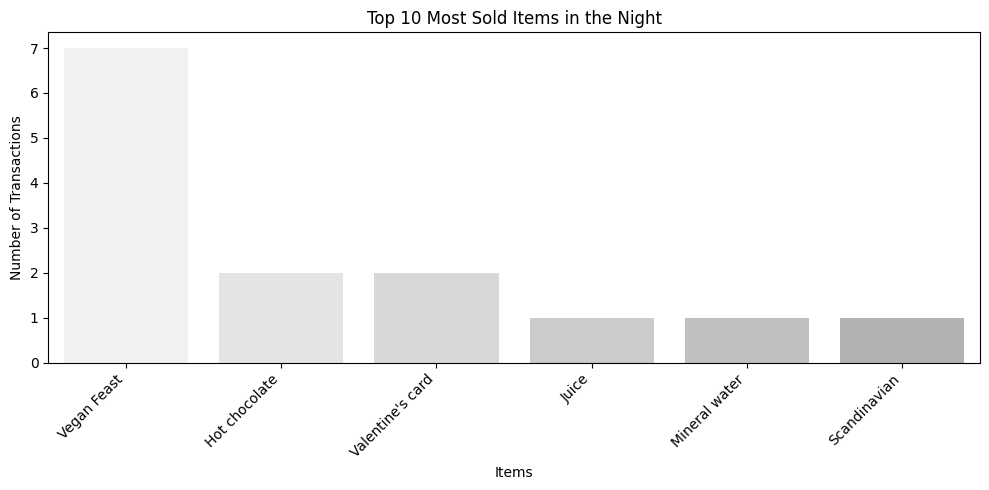

In [ ]:
# 20

import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_items(period_name, color):
    subset = df[df['period_day'] == period_name]
    top_items = subset['Item'].value_counts().head(10)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_items.index, y=top_items.values, palette=sns.light_palette(color, n_colors=10))
    plt.title(f"Top 10 Most Sold Items in the {period_name.capitalize()}")
    plt.xlabel("Items")
    plt.ylabel("Number of Transactions")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_items("morning", "blue")
plot_top_items("afternoon", "orange")
plot_top_items("evening", "purple")
plot_top_items("night", "gray")


21. It turns out that there is something different in the plot above, the insight is ____


night sales are minimal and do not follow the same customer behavior pattern seen in the morning, afternoon, or evening.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

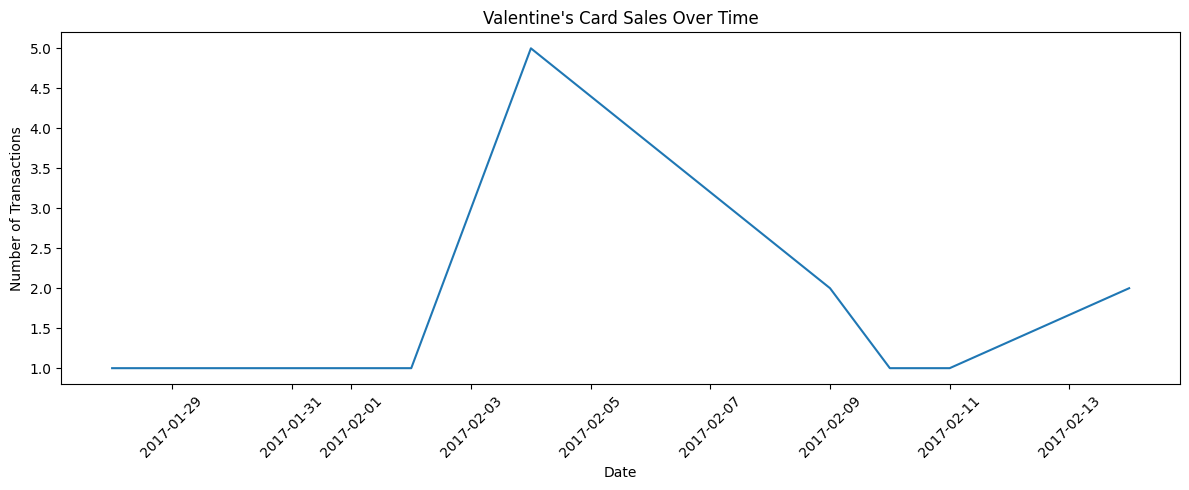

In [ ]:
#22

import matplotlib.pyplot as plt

valentine_df = df[df["Item"] == "Valentine's card"]
valentine_sales = valentine_df.groupby("date")["Item"].count()

plt.figure(figsize=(12, 5))
plt.plot(valentine_sales.index, valentine_sales.values)

plt.title("Valentine's Card Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


23. I found the insight from the sale of the Valentine's cards above is ____


that sales begin slowly, peak sharply about a week before Valentine’s Day, and then gradually decline as the holiday approaches.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [ ]:
# 24

basket = (
    df
    .groupby(["Transaction", "Item"])["Item"]
    .count()
    .unstack()
    .fillna(0)
)

basket.head()


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#25

basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()


C:\Users\miche\AppData\Local\Temp\ipykernel_30040\2460559246.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. Apriori: (min_support=0.02), Association Rules: (metric="lift", min_threshold=1)

In [ ]:
# 26
from mlxtend.frequent_patterns import apriori, association_rules
df_apriori = apriori(basket, min_support = 0.02, use_colnames = True)
df_apriori


C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [90]:
# 27

df_ar = association_rules(df_apriori, metric = "lift", min_threshold = 1)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Based on the association rule analysis, several meaningful item relationships emerge within The Bread Basket dataset. Coffee appears as the most influential product, frequently paired with items like cake, cookies, medialunas, juice, and pastries each showing lifts above 1, indicating that these items are purchased together more often than expected by chance. Strong two way associations are seen between tea and cake as well as pastry and bread, suggesting natural product pairings that customers tend to buy together. Toast also shows a notably high lift with coffee, revealing a strong complementary relationship. Overall, these patterns highlight clear cross-selling opportunities, especially involving coffee-based combinations and pastry-related items.